In [2]:
#Esse exmplo cria uma rede neural DNN - Deep Neural Network - que pode classificar imagens de números escritos a mão.

import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, datasets
from matplotlib import pyplot as plt
import numpy as np

In [3]:
#Carrega o dataset
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = datasets.mnist.load_data()

In [4]:
#verificando um dado de exemplo (primeiro valor)
print(y_train_raw[0])
print(x_train_raw.shape, y_train_raw.shape)
print(x_test_raw.shape, y_test_raw.shape)

5
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [5]:
#Convert the labels into one-hot codes.
#(criando os labels de classificação)
num_classes = 10
y_train = keras.utils.to_categorical(y_train_raw, num_classes)
y_test = keras.utils.to_categorical(y_test_raw, num_classes)
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


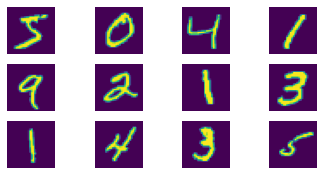

In [9]:
#verificando as 12 primeiras imagens do dataset
plt.figure()
for i in range(12):
    plt.subplot(4,4,i+1)
    plt.imshow(x_train_raw[i])
    plt.axis('off')
plt.show()

In [10]:
#Convert a 28 x 28 image into a 784 x 1 vector isso permite a comparação desse vetor com cada linha (imagem) do dataset
x_train = x_train_raw.reshape(60000, 784)
x_test = x_test_raw.reshape(10000, 784)

In [11]:
#Normalize image pixel values - valores ficam entre 0 e 1
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [13]:
#Create a deep neural network (DNN) model that consists of three fully connected layers and two RELU activation functions.
model = keras.Sequential([
layers.Dense(512, activation='relu', input_dim = 784),
layers.Dense(256, activation='relu'),
layers.Dense(124, activation='relu'),
layers.Dense(num_classes, activation='softmax')])
model.summary()
#abaixo são descritas cada camada do modelo, seu shape e número de parâmetros que são atualizados pela própria rede

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_6 (Dense)              (None, 124)               31868     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1250      
Total params: 566,366
Trainable params: 566,366
Non-trainable params: 0
_________________________________________________________________


In [16]:
#Compilando o modelo - opção 1 
Optimizer = optimizers.Adam(0.001)
model.compile(loss=keras.losses.categorical_crossentropy,
                optimizer=Optimizer, metrics=['accuracy'])

In [17]:
#Compilando o modelo da DNN - opção 2 com ADAM optimizer
#model.compile(loss=keras.losses.categorical_crossentropy,
#                optimizer=optimizers.Adam(0.001), metrics=['accuracy'])

In [18]:
#Fit the training data to the model by using the fit method - 10 épocas.d
model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
469/469 [==============================] - 3s 4ms/step - loss: 0.2328 - accuracy: 0.9306
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0828 - accuracy: 0.9748
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0543 - accuracy: 0.9828
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0409 - accuracy: 0.9872
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0296 - accuracy: 0.9903
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0246 - accuracy: 0.9920
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0227 - accuracy: 0.9924
Epoch 8/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0177 - accuracy: 0.9939
Epoch 9/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0182 - accuracy: 0.9939
Epoch 10/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0167 - accuracy: 0.9943

In [19]:
#avaliando a rede
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07507666200399399
Test accuracy: 0.9805999994277954


In [20]:
model.save('./model/final_DNN_model.h5')